**Built-in Functions**

([], [])

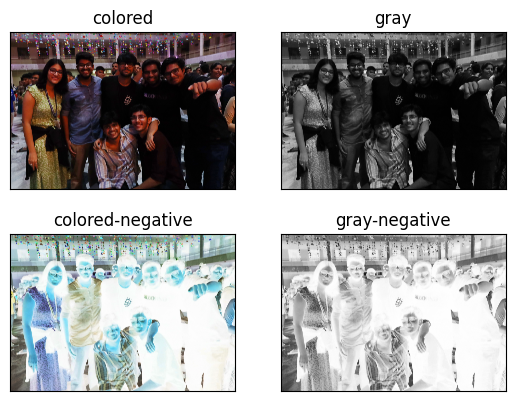

In [1]:
import cv2
import matplotlib.pyplot as plt

path = "C:/Abhinav/Test/Computer_Vision/IMG_2108.png"
img1 = cv2.imread(path)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

gray = cv2.imread(path, 0)

colored_negative = abs(255-img1)
gray_negative = abs(255-gray)

imgs = [img1, gray, colored_negative, gray_negative]
title = ['colored', 'gray', 'colored-negative', 'gray-negative']

plt.subplot(2,2,1)
plt.title(title[0])
plt.imshow(imgs[0], cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.title(title[1])
plt.imshow(imgs[1], cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.title(title[2])
plt.imshow(imgs[2])
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.title(title[3])
plt.imshow(imgs[3], cmap='gray')
plt.xticks([])
plt.yticks([])

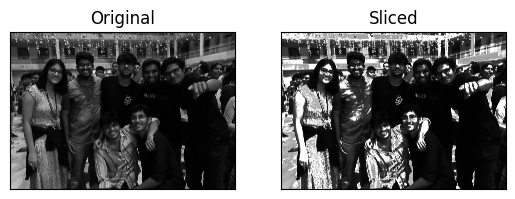

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image using OpenCV
img = cv2.imread('IMG_2108.png', cv2.IMREAD_GRAYSCALE)

# Get the dimensions of the image
row, column = img.shape

# Create an empty image with the same dimensions
img2 = np.zeros((row, column), dtype='uint8')

min_range = 80
max_range = 140

for i in range(row):
    for j in range(column):
        if img[i, j] > min_range and img[i, j] < max_range:
            img2[i, j] = 255
        else:
            img2[i, j] = img[i, j]

cv2.imwrite('sliceimage.jpeg', img2)

# Plotting
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title('Sliced')
plt.imshow(img2, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.show()

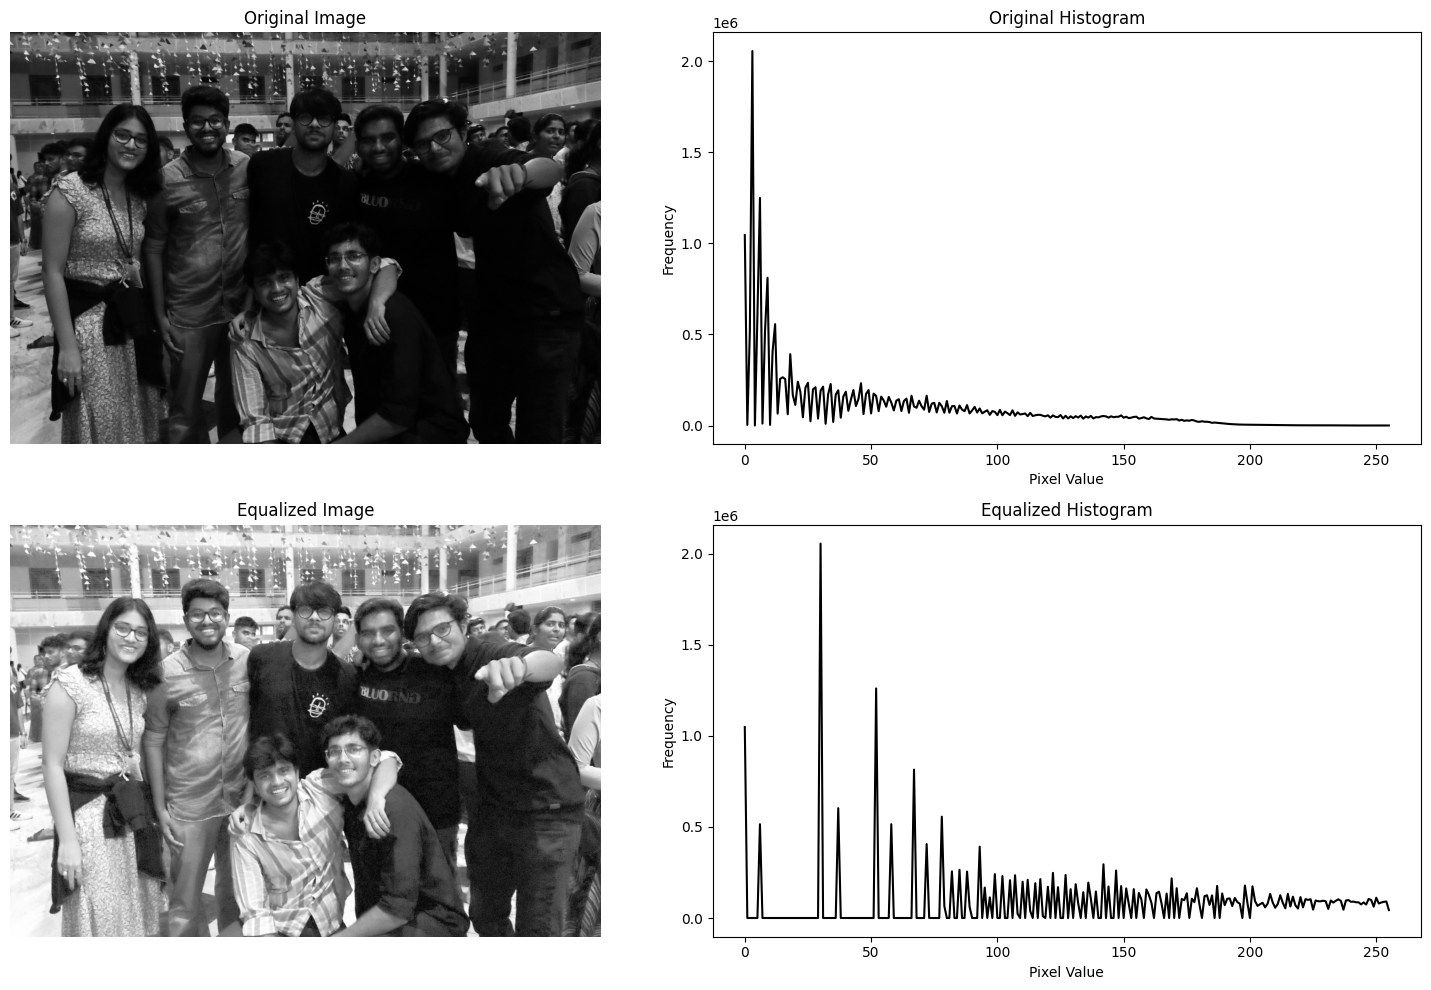

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('IMG_2108.png', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_img = cv2.equalizeHist(img)

# compute histogram
hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

# Display the original and equalized images
plt.figure(figsize=(15, 10))

# Display original image and histogram
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Original Histogram')
plt.plot(hist_original, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Display equalized image and histogram
plt.subplot(2, 2, 3)
plt.title('Equalized Image')
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Equalized Histogram')
plt.plot(hist_equalized, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**User-Defined Functions**

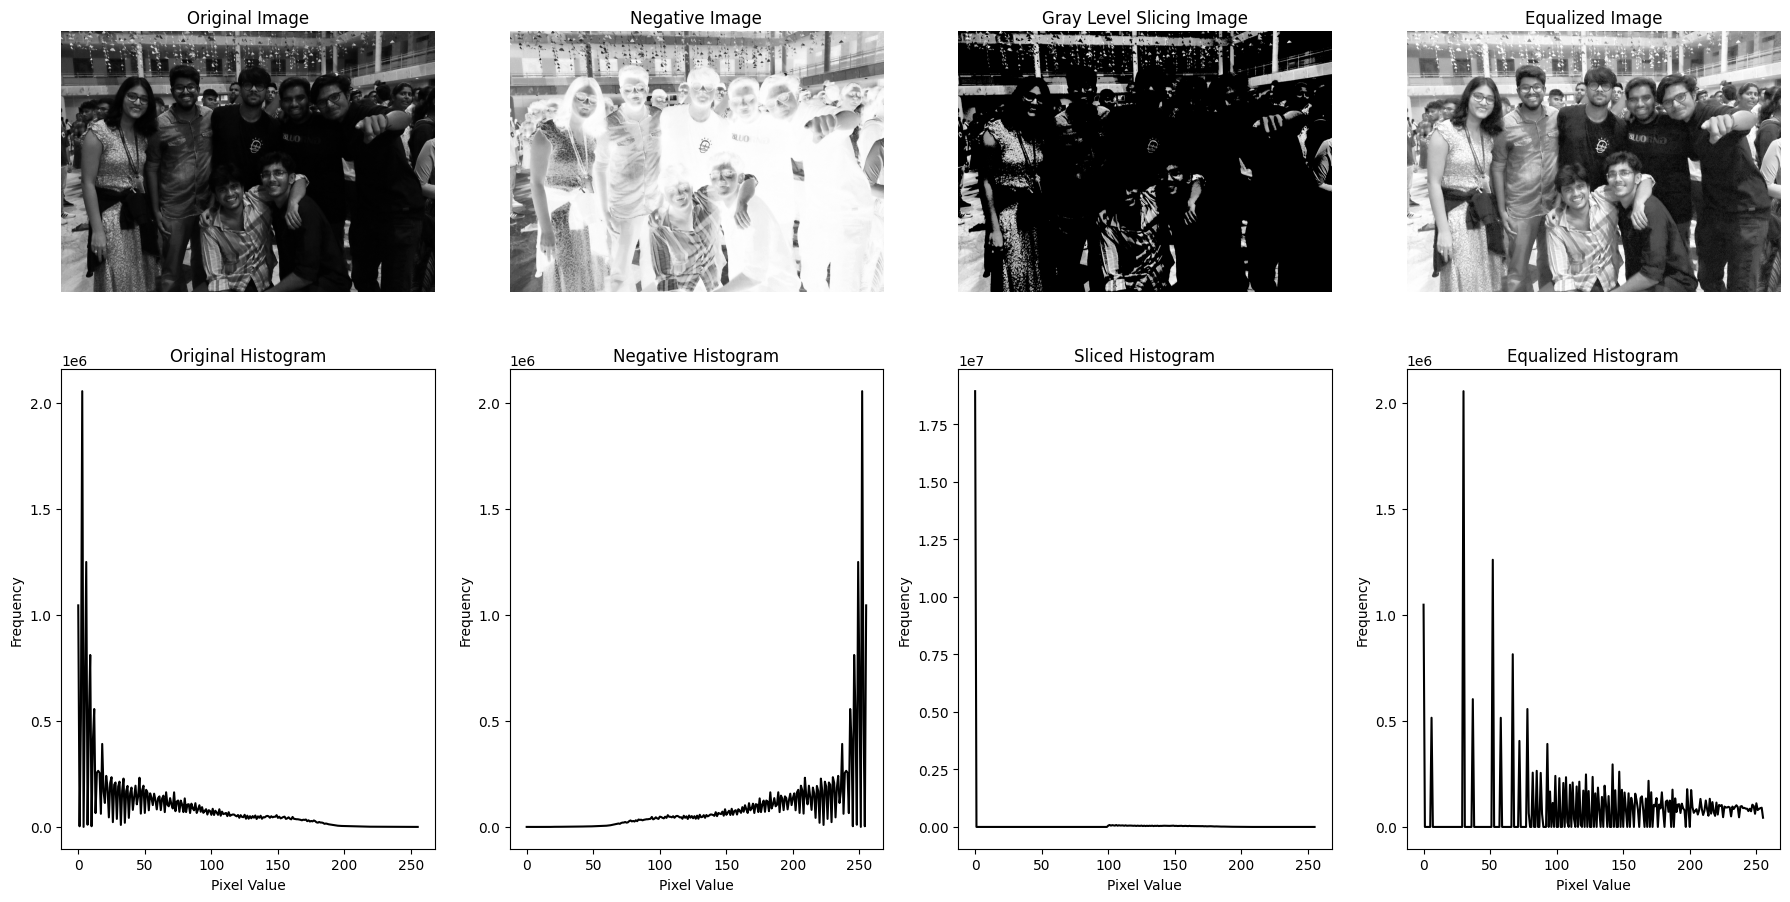

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for Image Negative
def image_negative(image):
    # Invert the pixel values
    negative_img = 255 - image
    return negative_img

# Function for Gray Level Slicing
def gray_level_slicing(image, low, high):
    # Create a mask where pixel values are within the specified range
    mask = cv2.inRange(image, low, high)
    # Apply the mask to the original image
    sliced_img = cv2.bitwise_and(image, image, mask=mask)
    return sliced_img

# Function for Histogram Equalization
def histogram_equalization(image):
    # Perform histogram equalization
    equalized_img = cv2.equalizeHist(image)
    return equalized_img

# Compute histogram
def compute_histogram(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return hist

# Load the image
img = cv2.imread('IMG_2108.png', cv2.IMREAD_GRAYSCALE)

# Set the parameters for gray level slicing
low_threshold = 100
high_threshold = 200

# Apply the operations
negative_img = image_negative(img)
sliced_img = gray_level_slicing(img, low_threshold, high_threshold)
equalized_img = histogram_equalization(img)

# Compute histograms
hist_original = compute_histogram(img)
hist_negative = compute_histogram(negative_img)
hist_sliced = compute_histogram(sliced_img)
hist_equalized = compute_histogram(equalized_img)

# Plotting the images using matplotlib
plt.figure(figsize=(18, 10))

# Original Image
plt.subplot(2, 4, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title('Original Histogram')
plt.plot(hist_original, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Negative Image
plt.subplot(2, 4, 2)
plt.title('Negative Image')
plt.imshow(negative_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title('Negative Histogram')
plt.plot(hist_negative, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Gray Level Slicing Image
plt.subplot(2, 4, 3)
plt.title('Gray Level Slicing Image')
plt.imshow(sliced_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title('Sliced Histogram')
plt.plot(hist_sliced, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Equalized Image
plt.subplot(2, 4, 4)
plt.title('Equalized Image')
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title('Equalized Histogram')
plt.plot(hist_equalized, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()